## Model with simulated data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* ypredicted : a + bX
* X : Normal data with mean 1.5 and standard deviation 0.5
* Yreal : 2 + 0.3*X + e   ---------- e->N(0,1)

In [2]:
X = 1.5 + 0.5*np.random.randn(100)
residual_error = np.random.randn(100)
Yreal = 2 + 25 * X + residual_error
Ypred = 2 + 25 * X

In [10]:
x_list = X.tolist()
Y_real_list = Yreal.tolist()
Y_pred_list = Ypred.tolist()
Y_mean = [np.mean(Yreal) for i in range(len(x_list))]

In [12]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_real":Y_real_list,
        "y_pred":Y_pred_list,
        "y_mean":Y_mean
    }    
)

In [13]:
data.head()

,x,y_mean,y_pred,y_real
0,1.386012,38.491595,36.650301,36.627541
1,1.338380,38.491595,35.459497,35.112569
2,1.588464,38.491595,41.711612,40.021748
3,1.583078,38.491595,41.576959,40.754416
4,1.146536,38.491595,30.663392,30.185554


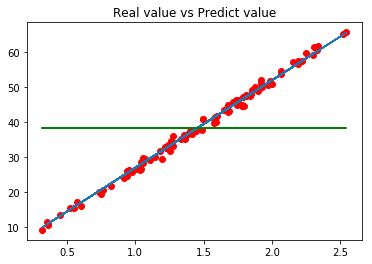

In [17]:
plt.plot(data["x"],data["y_real"],"ro")
plt.plot(data["x"],data["y_pred"])
plt.plot(data["x"],data["y_mean"],"g")
plt.title("Real value vs Predict value")
plt.show()

In [43]:
data["SSD"] = (data["y_real"] - data["y_pred"])**2
data["SSR"] = (data["y_mean"] - data["y_pred"])**2
data["SST"] = (data["y_mean"] - data["y_real"])**2

In [44]:
data.head()

,x,y_mean,y_pred,y_real,SSD,SSR,SST
0,1.386012,38.491595,36.650301,36.627541,0.000518,3.390364,3.474698
1,1.338380,38.491595,35.459497,35.112569,0.120359,9.193617,11.417819
2,1.588464,38.491595,41.711612,40.021748,2.855640,10.368505,2.341366
3,1.583078,38.491595,41.576959,40.754416,0.676578,9.519469,5.120355
4,1.146536,38.491595,30.663392,30.185554,0.228329,61.280769,68.990319


In [50]:
print sum(data["SSD"])
print sum(data["SSR"])
print sum(data["SST"])
print sum(data["SSD"] + data["SSR"])

88.6999392067
17178.9491781
17766.0197178
17267.6491173


In [49]:
SSD = sum(data["SSD"])
SSR = sum(data["SSR"])
SST = sum(data["SST"])

In [51]:
R2 = SSR / SST

In [53]:
R2

0.9669554267594141

(array([ 3.,  5.,  7., 10., 23., 17., 16., 10.,  6.,  3.]),
 array([-2.37255821, -1.91488504, -1.45721187, -0.9995387 , -0.54186553,
        -0.08419236,  0.37348081,  0.83115398,  1.28882715,  1.74650032,
         2.20417349]),
 <a list of 10 Patch objects>)

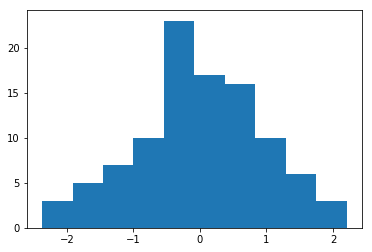

In [54]:
plt.hist(data["y_real"] - data["y_pred"])

In [56]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_real"])

In [59]:
data["beta_numerator"] = (data["x"] - x_mean) * (data["y_real"] - y_mean)
data["beta_denominator"] = (data["x"] - x_mean)**2
beta = sum(data["beta_numerator"])/sum(data["beta_denominator"])
beta

25.362646442851865

In [61]:
alpha = y_mean - beta * x_mean
alpha

1.4605395267798755

In [63]:
data["y_model"] = alpha + beta * data["x"]
data.head()

,x,y_mean,y_pred,y_real,SSD,SSR,SST,beta_numerator,beta_denominator,y_model
0,1.386012,38.491595,36.650301,36.627541,0.000518,3.390364,3.474698,0.138035,0.005484,36.613473
1,1.338380,38.491595,35.459497,35.112569,0.120359,9.193617,11.417819,0.411170,0.014807,35.405396
2,1.588464,38.491595,41.711612,40.021748,2.855640,10.368505,2.341366,0.196474,0.016487,41.748202
3,1.583078,38.491595,41.576959,40.754416,0.676578,9.519469,5.120355,0.278362,0.015133,41.611596
4,1.146536,38.491595,30.663392,30.185554,0.228329,61.280769,68.990319,2.604169,0.098299,30.539719


In [72]:
SSD_model = sum((data["y_model"] - data["y_real"])**2)
SST_model = sum((data["y_real"] - y_mean)**2)
SSR_model = sum((data["y_model"] - y_mean)**2)

In [73]:
R2_model = (SSR_model)/ (SST_model)
R2_model

0.9952113528032926

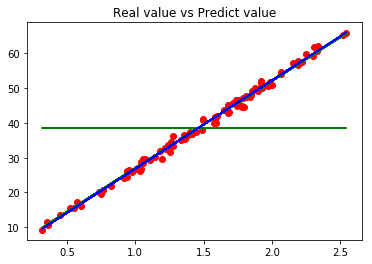

In [77]:
plt.plot(data["x"],data["y_real"],"ro")
plt.plot(data["x"],data["y_pred"],"g")
plt.plot(data["x"],data["y_mean"],"g")
plt.plot(data["x"],data["y_model"],"b")
plt.title("Real value vs Predict value")
plt.show()

## The relative standard error or RSE

In [80]:
RSE = np.sqrt(SSD_model/(len(data)-2))
RSE

0.9317265108416825

In [81]:
RSE / np.mean(data["y_real"])

0.02420597283797501